In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download hrishikeshkini/category-file

  0% 0.00/524 [00:00<?, ?B/s]
100% 524/524 [00:00<00:00, 814kB/s]


In [7]:
! kaggle datasets download datasnaek/youtube

 70% 39.0M/55.9M [00:00<00:00, 81.0MB/s]
100% 55.9M/55.9M [00:00<00:00, 141MB/s] 


In [6]:
! unzip category-file.zip

Archive:  category-file.zip
  inflating: category_file.txt       


In [9]:
! unzip youtube.zip

Archive:  youtube.zip
  inflating: GB_category_id.json     
  inflating: GBcomments.csv          
  inflating: GBvideos.csv            
  inflating: US_category_id.json     
  inflating: UScomments.csv          
  inflating: USvideos.csv            


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [12]:
comments = pd.read_csv(r'/content/UScomments.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [14]:
comments.shape

(691400, 4)

In [15]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [16]:
comments.dropna(inplace=True)

In [17]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

**Performing Sentiment Analysis**

In [18]:
!pip install textblob

In [19]:
from textblob import TextBlob
TextBlob("yu are the best").sentiment.polarity

1.0

In [20]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [21]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [22]:
comments['polarity'] = polarity

In [23]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [24]:
comments[comments['polarity'] == 1]

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [25]:
positive_coomments = comments[comments['polarity'] == 1]

In [26]:
positive_coomments.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [27]:
negative_coomments = comments[comments['polarity'] == -1]

In [28]:
negative_coomments.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


**Wordcloud representation of sentiments**

In [29]:
!pip install wordCloud

In [30]:
from wordcloud import WordCloud, STOPWORDS

In [31]:
negative_coomments['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [32]:
positive_coomments['comment_text']

64                                          yu are the best
156       Power is the disease.  Care is the cure.  Keep...
227       YAS Can't wait to get it! I just need to sell ...
307                                       This is priceless
319                                     Summed up perfectly
                                ...                        
691373                               Perfect. Every version
691383                                    Me encantaaaaa <3
691388                                     Best song ever 🤘
691389                                excellent performance
691393                                                   <3
Name: comment_text, Length: 19390, dtype: object

In [33]:
total_comments_neg = ' '.join(negative_coomments['comment_text'])

In [34]:
total_comments_pos = ' '.join(positive_coomments['comment_text'])

In [35]:
total_comments_neg[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

In [36]:
total_comments_pos[0:100]

'yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as bes'

In [37]:
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

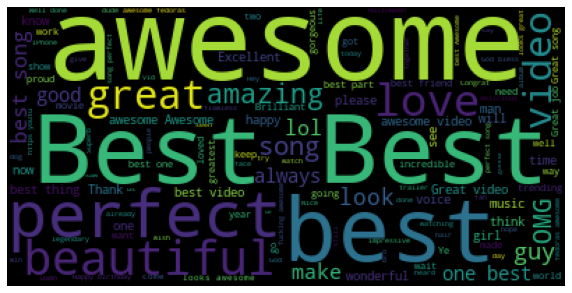

In [38]:
wordcloud = WordCloud(stopwords=(set(STOPWORDS))).generate(total_comments_pos)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

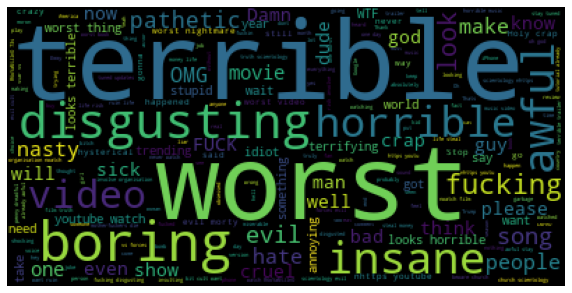

In [39]:
wordcloud = WordCloud(stopwords=(set(STOPWORDS))).generate(total_comments_neg)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')

**Emoji Analysis**

In [40]:
!pip install emoji

     |████████████████████████████████| 174 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=4497c6be05276ea175a14a5d508844acc36dba1a5ca580b4247866debec1c56c
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [41]:
import emoji
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [42]:
print('😉')

😉


In [43]:
print("\U0001F923")

🤣


In [44]:
comment = 'trending 😉'

In [45]:
comment

'trending 😉'

In [46]:
[c for c in comment if c in emoji.UNICODE_EMOJI_ENGLISH]

['😉']

In [47]:
emoji_list = []
for comment in comments['comment_text']:
    for c in comment:
        if c in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(c)

In [48]:
len(emoji_list)

294549

In [49]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [50]:
from collections import Counter
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [51]:
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [52]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]
freq = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [53]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [54]:
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [55]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [56]:
trace = go.Bar(x = emojis, y = freq)
iplot([trace])

**Collecting Entire data**

In [58]:
import os
path  = r'/content'
files = os.listdir(path)

In [59]:
files

['.config',
 'category_file.txt',
 'youtube.zip',
 'kaggle.json',
 'USvideos.csv',
 'US_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'UScomments.csv',
 'category-file.zip',
 'GBcomments.csv',
 'sample_data']

In [60]:
csv = ['GBvideos.csv', 'USvideos.csv']
csv

['GBvideos.csv', 'USvideos.csv']

In [61]:
csv[1].split('.')[0][0:2]

'US'

In [62]:
full_df = pd.DataFrame()
for file in csv:
    df = pd.read_csv(path+'/'+file, encoding='iso-8859-1', error_bad_lines=False)
    df['country'] = file.split('.')[0][0:2]
    full_df = pd.concat([full_df, df])
    
    

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.



b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'
b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [63]:
full_df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,country
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09,GB
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09,GB
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09,GB
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09,GB
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09,GB


**Most liked category**

In [66]:
cat = pd.read_csv('/content/category_file.txt', sep= ':')
cat.head()

,Category_id Category_name
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [67]:
cat.reset_index(inplace=True)

In [68]:
cat.columns = ['category_id', 'category_name']
cat

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [69]:
cat.set_index('category_id', inplace=True)
cat

,category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [70]:
dct = cat.to_dict()

In [71]:
dct['category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [73]:
full_df['category_name'] = full_df['category_id'].map(dct['category_name'])

In [74]:
full_df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,country,category_name
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09,GB,Science & Technology
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09,GB,Entertainment
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09,GB,Entertainment
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09,GB,Film & Animation
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09,GB,Howto & Style


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

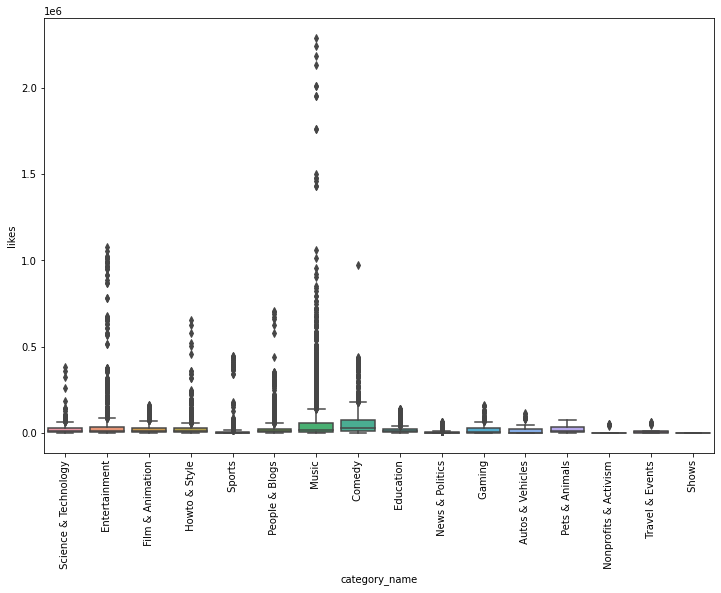

In [75]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(x = 'category_name', y = 'likes', data = full_df)
plt.xticks(rotation = 'vertical')

**Whether audience is engaging or not**

In [76]:
full_df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date',
       'country', 'category_name'],
      dtype='object')

In [77]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_total_rate'] = (full_df['comment_total']/full_df['views'])*100

In [78]:
full_df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,country,category_name,like_rate,dislike_rate,comment_total_rate
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09,GB,Science & Technology,1.053540,0.182430,0.009493
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09,GB,Entertainment,0.536419,0.264871,0.000000
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09,GB,Entertainment,9.185753,0.105728,0.798913
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09,GB,Film & Animation,4.159990,0.096770,0.227717
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09,GB,Howto & Style,12.364505,0.140422,1.207134


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

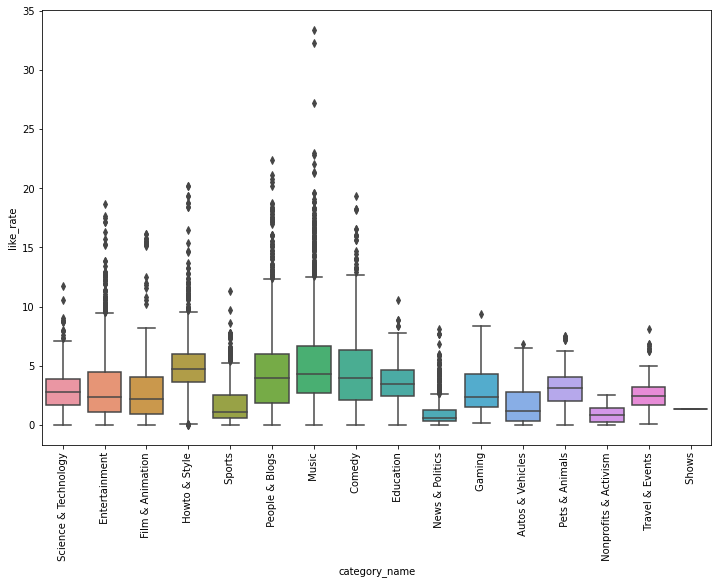

In [79]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'category_name', y = 'like_rate', data = full_df)
plt.xticks(rotation = 'vertical')

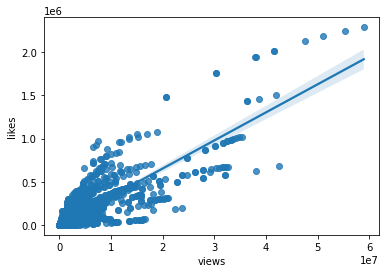

In [80]:
sns.regplot(data=full_df, x='views', y = 'likes')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

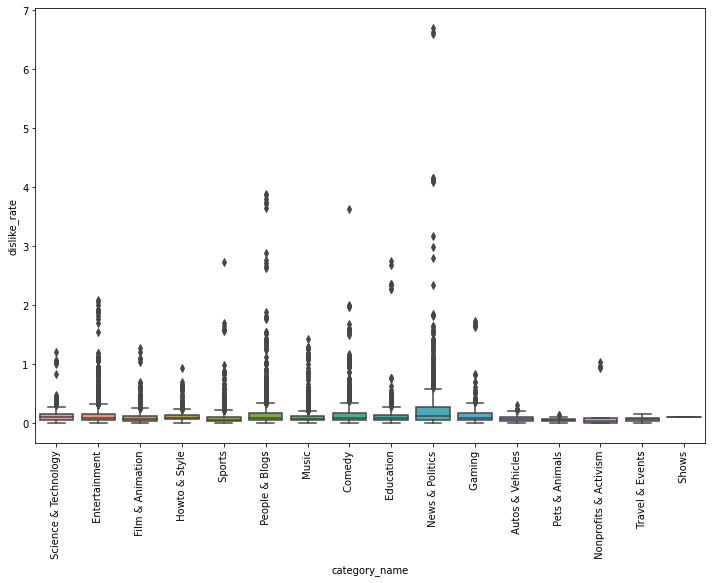

In [81]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'category_name', y = 'dislike_rate', data = full_df)
plt.xticks(rotation = 'vertical')

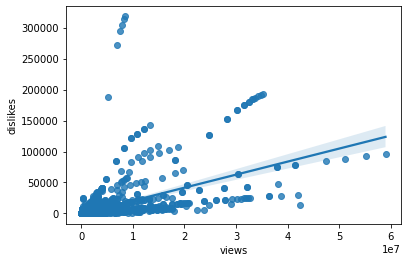

In [82]:
sns.regplot(data=full_df, x='views', y = 'dislikes')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

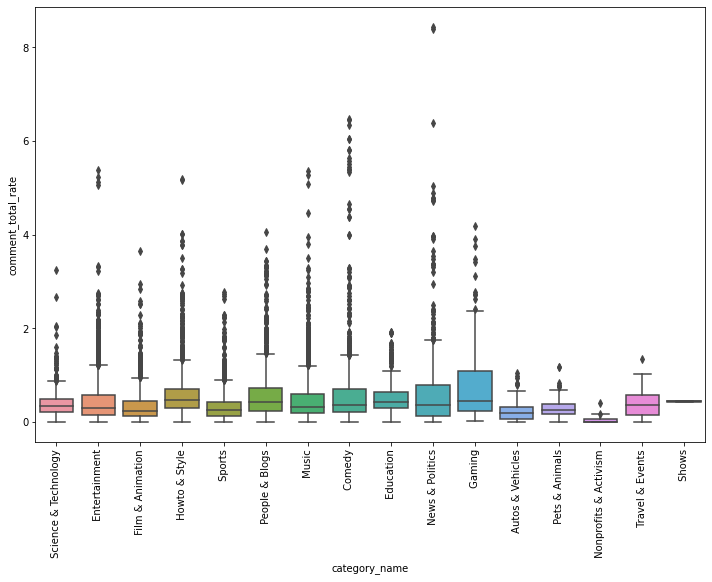

In [83]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'category_name', y = 'comment_total_rate', data = full_df)
plt.xticks(rotation = 'vertical')

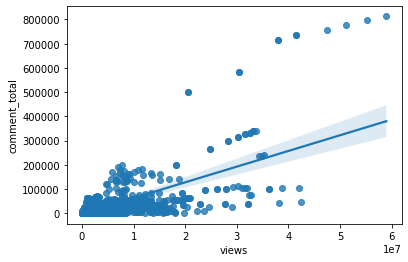

In [84]:
sns.regplot(data=full_df, x='views', y = 'comment_total')

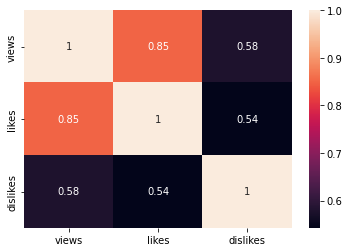

In [85]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

**Which channel has largest number of trending videos?**

In [86]:
full_df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date',
       'country', 'category_name', 'like_rate', 'dislike_rate',
       'comment_total_rate'],
      dtype='object')

In [87]:
cdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = False).to_frame().reset_index().rename(columns = {'video_id':'tatal_videos'})

In [88]:
cdf

,channel_title,tatal_videos
0,First We Feast,79
1,The Tonight Show Starring Jimmy Fallon,78
2,Jimmy Kimmel Live,77
3,jacksfilms,77
4,Vox,75
...,...,...
1699,Concert Daily,1
1700,Complex News,1
1701,Comicbook.com,1
1702,aao331,1


In [89]:
import plotly.express as px

In [90]:
px.bar(data_frame = cdf[0:20], x = 'channel_title', y = 'tatal_videos')

**Does punctuation in title and tags have any relation with views, likes, dislikes, comments?**

In [91]:
full_df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date',
       'country', 'category_name', 'like_rate', 'dislike_rate',
       'comment_total_rate'],
      dtype='object')

In [92]:
full_df['title']

0       Live Apple Event - Apple September Event 2017 ...
1       Holly and Phillip Meet Samantha the Sex Robot ...
2                         My DNA Test Results! I'm WHAT?!
3       getting into a conversation in a language you ...
4                                    Baby Name Challenge!
                              ...                        
7987                       How Do MASSIVE Sinkholes Form?
7988    Trump slams Clinton for defending NFL anthem p...
7989    LP - Lost On You (A Night at The McKittrick Ho...
7990    TrÃ© Melvin @ #YouTubeBlack FanFest Washington...
7991    First cosmic event seen in gravitational waves...
Name: title, Length: 15985, dtype: object

In [93]:
import string

In [94]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [95]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [96]:
text = 'Live Apple Event - Apple September Event 2017'

In [97]:
punc_count(text)

1

In [98]:
full_df['count_punc'] = full_df['title'].apply(punc_count)

In [99]:
full_df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,country,category_name,like_rate,dislike_rate,comment_total_rate,count_punc
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09,GB,Science & Technology,1.053540,0.182430,0.009493,5
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09,GB,Entertainment,0.536419,0.264871,0.000000,1
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09,GB,Entertainment,9.185753,0.105728,0.798913,4
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09,GB,Film & Animation,4.159990,0.096770,0.227717,1
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09,GB,Howto & Style,12.364505,0.140422,1.207134,1


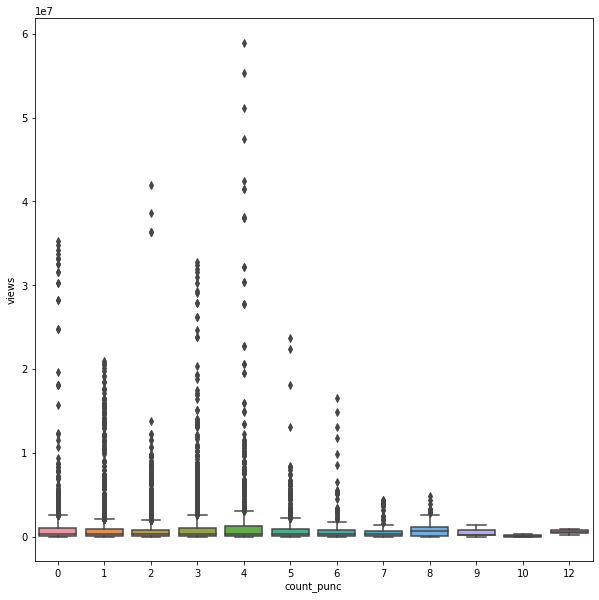

In [100]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'count_punc', y = 'views', data = full_df)